In [8]:
#import the package
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


In [9]:
#define the file path
bass_file= 'DataSet/nsynth-valid/audio/bass_electronic_018-022-075.wav'

#Store class names in array
class_names=['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ', 'reed', 
             'string', 'synth_lead', 'vocal']
#Store source names in array
source_names=['acoustic', 'electronic', 'synthetic']


#load the waveform y and sampling rate s
y, sr = librosa.load(bass_file, sr=None)
print(y)
print(sr)

hop_length = 512

[0.00018311 0.00259399 0.00552368 ... 0.         0.         0.        ]
16000


In [23]:
# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Compute Mel-Frequency Cepstral Coefficients (MFCC) features 
# from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)

# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

# Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, 
                                                 fmax = 8000)

#Spectrogram of Short Time Fourier Transform
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(y)), 
                                      ref=np.max)

# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)

#Compute the centroid 
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

#Spectral Contrast
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)


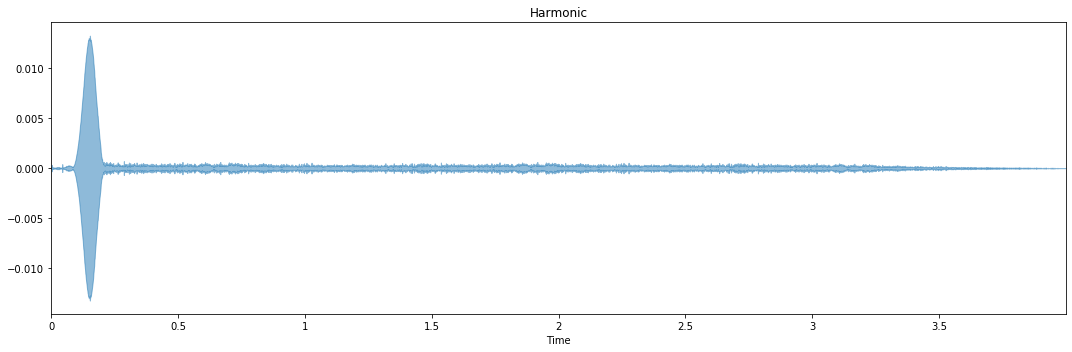

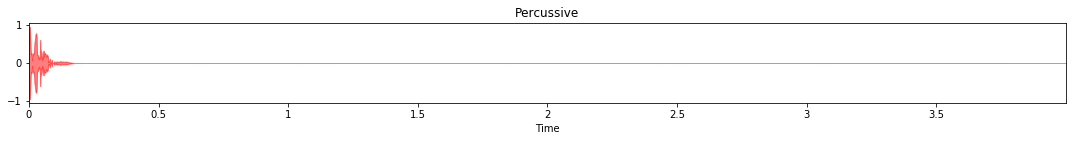

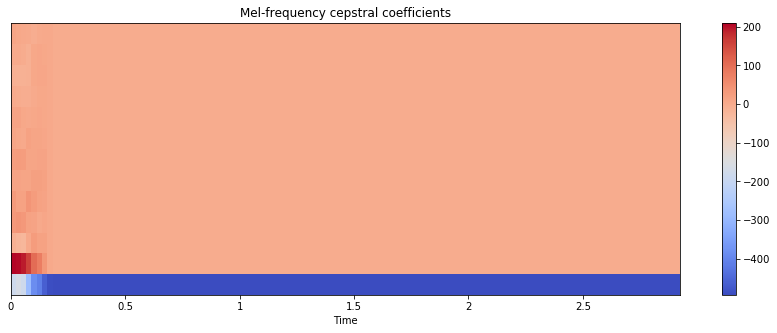

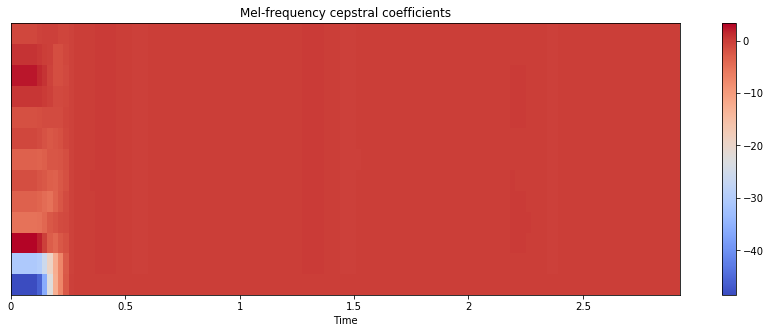

Text(0.5, 1.0, 'Spectral contrast')

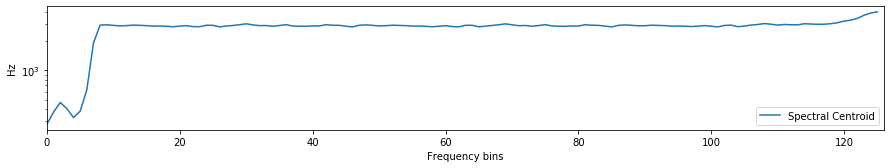

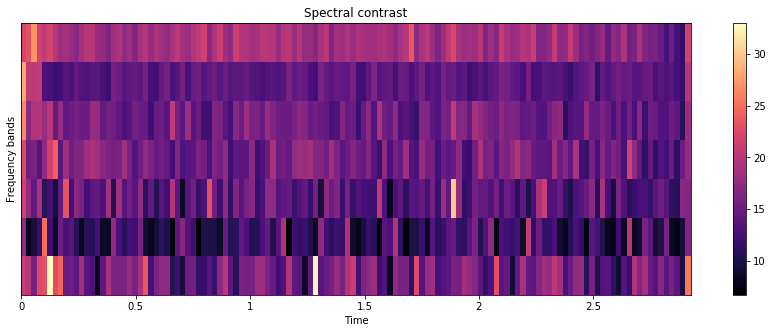

In [28]:
plt.figure(0,figsize=(15,5))
librosa.display.waveplot(y_harmonic, sr=sr, alpha=0.5)
plt.title('Harmonic')
plt.tight_layout()
plt.show()

plt.figure(1, figsize=(15,5))
plt.subplot(3, 1, 1)
librosa.display.waveplot(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Percussive')
plt.tight_layout()
plt.show()

plt.figure(2, figsize=(15,5))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients')
plt.show()

plt.figure(3, figsize=(15,5))
librosa.display.specshow(mfcc_delta, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients')
plt.show()

plt.figure(4, figsize=(15,5))
plt.subplot(2, 1, 1)
plt.semilogy(centroid.T, label='Spectral Centroid')
plt.ylabel('Hz')
plt.xticks(np.arange(0,centroid.shape[-1],20))
plt.xlim([0, centroid.shape[-1]])
plt.xlabel('Frequency bins')
plt.show()

plt.figure(5, figsize=(15,5))
librosa.display.specshow(spectral_contrast,x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')
plt.show()